In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("C:\\Users\\karan\\Downloads\\data.csv")

HEAD

In [11]:
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


View

In [57]:
df

,Duration,Pulse,Maxpulse,Calories
Date,,,,
2020-12-01,60,110,130,409.10
2020-12-02,60,117,145,479.00
2020-12-03,60,103,135,340.00
2020-12-04,45,109,175,282.40
2020-12-05,45,117,148,406.00
2020-12-06,60,102,127,300.00
2020-12-07,60,110,136,374.00
2020-12-08,45,104,134,253.30
2020-12-09,30,109,133,195.10


Info

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-12-01 to 2020-12-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Pulse     32 non-null     int64  
 2   Maxpulse  32 non-null     int64  
 3   Calories  32 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


Describe

In [59]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,32.000000
mean,55.781250,103.500000,128.500000,304.680000
std,7.840072,7.832933,12.998759,63.839129
min,30.000000,90.000000,101.000000,195.100000
25%,56.250000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,300.000000
75%,60.000000,106.500000,132.250000,341.325000
max,60.000000,130.000000,175.000000,479.000000


Changing to datetime

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')
df.fillna({'Date' : df['Date'].interpolate()}, inplace = True)

Changing wrong data

In [26]:
df.loc[7, 'Duration'] = 45

Filling Missing values


In [29]:
df.fillna({'Calories' : df['Calories'].mean()}, inplace = True)


Changing to Time Series Data

In [32]:
df.set_index('Date', inplace = True)

Correlation

In [61]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.066974,-0.258764,0.323423
Pulse,-0.066974,1.000000,0.276583,0.487017
Maxpulse,-0.258764,0.276583,1.000000,0.347419
Calories,0.323423,0.487017,0.347419,1.000000


Regression plot of Pulse vs Calories


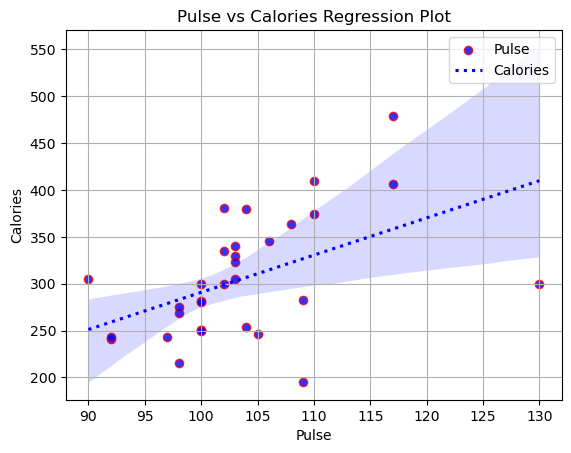

In [38]:
def reg_plot():
    sns.regplot(x = 'Pulse', y = 'Calories', data = df, scatter_kws = {'color' : 'blue', 'edgecolor' : 'red', 'marker' : 'D', 'alpha' : 0.8}, line_kws = {'linestyle' : ':', 'color' : 'blue'})
    plt.title('Pulse vs Calories Regression Plot')
    plt.legend(['Pulse' , 'Calories'])
    plt.grid()
    plt.show()

reg_plot()

Groupby of duration and Maxpulse (max), Pulse & Calories (mean) [with cal_dur_ratio (mean)]

In [41]:
df_duration = df.copy()
df_duration['cal_dur_ratio'] = df['Calories'] / df['Duration']
df_duration['duration'] = df_duration['Duration']

agg_fns = {'Maxpulse' : 'max', 'Pulse' : 'mean' , 'Calories' : 'mean', 'cal_dur_ratio' : 'mean', 'duration' : 'mean'}
df_duration = df_duration.groupby('Duration').agg(agg_fns)
df_duration = df_duration.astype({'duration' : 'int64'})

df_duration


,Maxpulse,Pulse,Calories,cal_dur_ratio,duration
Duration,,,,,
30,133,109.000000,195.100000,6.503333,30
45,175,103.142857,288.197143,6.404381,45
60,147,103.375000,314.053333,5.234222,60


Calories burned in the 12th month of 2020

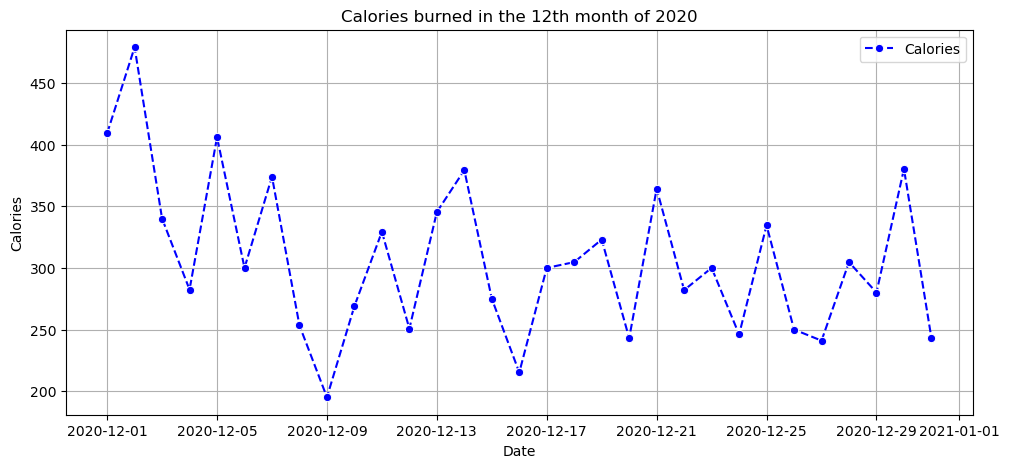

In [44]:
def cal_plot():
    df_cal = df.copy()
    plt.figure(figsize = (11.7, 5))
    sns.lineplot(x = df_cal.index , y = 'Calories', data = df_cal, color = 'blue', linestyle = '--', marker = 'o', label = 'Calories')
    plt.title('Calories burned in the 12th month of 2020')
    plt.legend()
    plt.grid()
    plt.show()
cal_plot()


Getting total & mean duration spent and calories burned in a month


In [47]:
dur_total = df['Duration'].sum()
cal_total = df['Calories'].sum()

dur_mean = df['Duration'].mean()
cal_mean = df['Calories'].mean()

print(f"In the given data the person spent {dur_total} mins and burned {cal_total:.2f} calories")
print(f"In the given data the person spend average of {dur_mean:.2f} mins and burned an average of {cal_mean:.2f} calories per day")

In the given data the person spent 1785 mins and burned 9749.76 calories
In the given data the person spend average of 55.78 mins and burned an average of 304.68 calories per day


Weekly Time Series Data 

In [50]:
df_weekly = df.resample('W').mean()
df_weekly

,Duration,Pulse,Maxpulse,Calories
Date,,,,
2020-12-06,55.000000,109.666667,143.333333,369.416667
2020-12-13,54.375000,103.750000,130.250000,283.425000
2020-12-20,55.714286,98.571429,122.142857,291.454286
2020-12-27,55.714286,105.285714,121.000000,288.242857
2021-01-03,60.000000,99.250000,127.000000,301.995000


Weekly Bar Graph of Avergae Calories

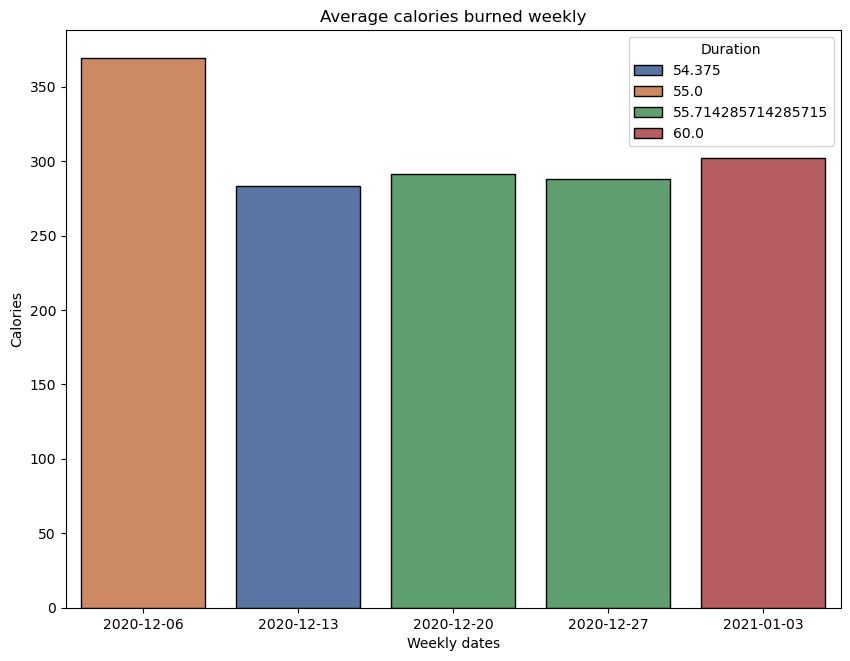

In [53]:
def bar_plot():
    plt.figure(figsize = (10, 7.5))
    sns.barplot(x = df_weekly.index, y = 'Calories', data = df_weekly, palette = 'deep', hue = 'Duration', edgecolor = 'black')
    plt.xlabel("Weekly dates")
    plt.title("Average calories burned weekly")
    plt.show()

bar_plot()